In [0]:
import os
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [0]:
import numpy as np
import matplotlib.pyplot as plt

x_test[0]

In [0]:
from random import shuffle

In [0]:
def simg(img):
  ysize, xsize = img.shape
  result1 = np.ones((ysize, xsize))

  ysize = int(ysize/2)
  xsize = int(xsize/2)

  parts = []
  for i in range(2):
    for j in range(2):
      parts.append(img[ysize * i: ysize * (i+1), xsize * j: xsize * (j+1)])

  result2 = list(range(len(parts)))
  shuffle(result2)

  for num, i in enumerate(result2):
    result1[ysize * int(num/2): ysize * (int(num/2) + 1), xsize * (num%2): xsize * ((num%2) + 1)] *= parts[i]

  return (result1, result2)

In [0]:
def makeDS(X):
  xarr = []
  yarr = []

  for i in X:
    x, y = simg(i)
    xarr.append(x)
    yarr.append(y)

  return (xarr, yarr)

In [42]:
X_ori = np.concatenate([x_train, x_test], axis=0)

X, Y = makeDS(X_ori)

len(X)

70000

In [0]:
from sklearn.preprocessing import Normalizer

preprocesser = Normalizer()

Xshape = X_ori.shape

X_rs = X_ori.reshape(-1, 784)

X_rs = preprocesser.transform(X_rs)

X_ori = X_rs.reshape(Xshape)

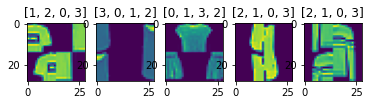

In [44]:
for i in range(1,6):
  ax = plt.subplot(1, 5, i)
  ax.imshow(X[i])
  ax.set_title(Y[i])

plt.show()

In [0]:
from sklearn.preprocessing import OneHotEncoder

oheEncoder = OneHotEncoder()
oheEncoder.fit(Y)
Y_ = oheEncoder.transform(Y).toarray().reshape(-1, 4, 4)

In [37]:
Y_

array([[[0., 0., 0., 1.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [0., 0., 1., 0.]],

       [[0., 0., 1., 0.],
        [0., 0., 0., 1.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.]],

       [[0., 0., 1., 0.],
        [0., 1., 0., 0.],
        [0., 0., 0., 1.],
        [1., 0., 0., 0.]],

       ...,

       [[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.]],

       [[0., 0., 0., 1.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [1., 0., 0., 0.]],

       [[0., 1., 0., 0.],
        [0., 0., 0., 1.],
        [1., 0., 0., 0.],
        [0., 0., 1., 0.]]])

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

print(len(X_train))
print(len(X_test))
print(len(Y_train))

52500
17500
52500


In [0]:
X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

In [73]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Dense, BatchNormalization, Dropout, Input, MaxPool2D, Reshape, Flatten, Softmax

model = Sequential()

model.add(Input(shape=(28, 28)))
model.add(Reshape((28, 28, 1)))
model.add(Conv2D(20, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(20, (3, 3), padding='same', activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(20, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(20, (3, 3), padding='same', activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(300))
model.add(Dense(100))
model.add(Dropout(0.5))
model.add(Dense(16))
model.add(Reshape((4, 4)))
model.add(Softmax(axis=2))

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_12 (Reshape)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 28, 28, 20)        200       
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 28, 28, 20)        3620      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 14, 14, 20)        3620      
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 14, 14, 20)        3620      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 7, 7, 20)         

In [0]:
from tensorflow.keras.losses import sparse_categorical_crossentropy

model.compile(optimizer='adam', loss=sparse_categorical_crossentropy, metrics=['acc'])

In [75]:
model.fit(X_train, Y_train, epochs=20, batch_size=500)

Epoch 1/20
105/105 [==============================] - 96s 911ms/step - loss: 1.1463 - acc: 0.7181
Epoch 2/20
105/105 [==============================] - 92s 877ms/step - loss: 0.1807 - acc: 0.9342
Epoch 3/20
 18/105 [====>.........................] - ETA: 1:12 - loss: 0.1161 - acc: 0.9602

KeyboardInterrupt: ignored

In [76]:
model.evaluate(X_test, Y_test)

547/547 [==============================] - 11s 20ms/step - loss: 0.0603 - acc: 0.9802


[0.06032118573784828, 0.9802285432815552]

In [69]:
x = model.predict(X_train[0:1])[0]
np.argmax(x, axis=1)

array([1, 2, 0, 3])

In [70]:
print(Y_train[0])

[1 2 0 3]


In [0]:
with open('puzzle_clear.json','w') as f:
  f.write(model.to_json())

model.save_weights('puzzle_clear.h5')